In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = pd.read_csv('ipl_score_predictor_data.csv')
print(data.head(8))
print(data.columns)

   match_id  batting_team  bowling_team  current_run_rate  wickets_remaining  \
0       103             2             1          5.591214                  6   
1       436             4             1          5.463938                  4   
2       861             8             2          9.838063                  5   
3       271             7             2          6.358586                  6   
4       107             9             6          9.352279                  2   
5        72             8             7          7.786832                  9   
6       701             5             5          8.768868                  2   
7        21             2             1          7.015823                  4   

   runs_remaining       over    avg_runs  total_wickets  innings  winner  
0              98  14.884233  193.220574              5        2       0  
1             104  13.620789  173.208460              4        1       0  
2              29   4.750129  198.632391              

In [14]:
#Fill missing values
data.fillna(0, inplace=True)

# Convert categorical columns to numerical labels
data['batting_team'] = data['batting_team'].astype('category').cat.codes
data['bowling_team'] = data['bowling_team'].astype('category').cat.codes

# Define features and target variable
X = data[['batting_team', 'bowling_team', 'current_run_rate', 'wickets_remaining', 'runs_remaining', 'over', 'avg_runs', 'total_wickets']]
y = data['winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.50
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.33      0.25      0.29         8

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.48      0.50      0.48        20



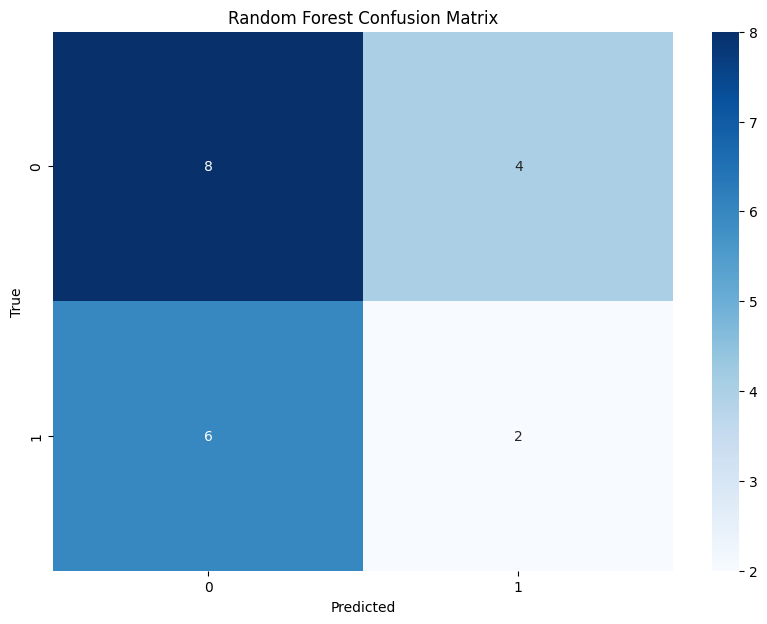

In [16]:
# Confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [17]:
# Deep Learning Model
dl_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5499 - loss: 2.0733 - val_accuracy: 0.2500 - val_loss: 1.9985
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.9684 - val_accuracy: 0.7500 - val_loss: 0.4872
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5429 - loss: 0.8374 - val_accuracy: 0.6250 - val_loss: 0.6370
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6419 - loss: 0.6537 - val_accuracy: 0.3750 - val_loss: 0.6731
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6417 - loss: 0.6425 - val_accuracy: 0.5000 - val_loss: 0.6516
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7272 - loss: 0.5765 - val_accuracy: 0.3750 - val_loss: 0.8104
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6068 - loss: 0.7024 - val_accuracy: 0.5000 - val_loss: 0.9806
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6016 - loss: 0.7317 - val_accuracy: 0.7500 - val_loss: 0.6383
Epoch 9/20
9/9 ━━━

In [18]:
# Evaluate the model
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype('int32')

accuracy_dl = accuracy_score(y_test, y_pred_dl)
print(f"Deep Learning Model Accuracy: {accuracy_dl:.2f}")
print("Deep Learning Classification Report:")
print(classification_report(y_test, y_pred_dl))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Deep Learning Model Accuracy: 0.60
Deep Learning Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.50      0.50      0.50         8

    accuracy                           0.60        20
   macro avg       0.58      0.58      0.58        20
weighted avg       0.60      0.60      0.60        20



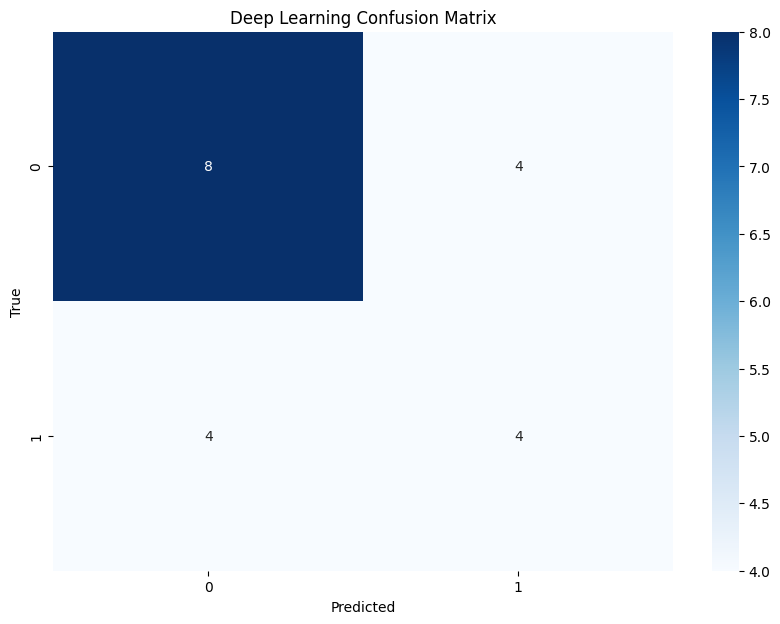

In [19]:
# Confusion matrix for Deep Learning model
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(10,7))
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep Learning Confusion Matrix')
plt.show()

In [20]:
# Function to get the winning probabilities and scoreline for a specific match situation
def predict_match_outcome(match_situation):
    match_data = pd.DataFrame([match_situation])
    match_data['batting_team'] = match_data['batting_team'].astype('category').cat.codes
    match_data['bowling_team'] = match_data['bowling_team'].astype('category').cat.codes

    # Random Forest predictions
    rf_probabilities = rf_model.predict_proba(match_data)
    print(f"Random Forest Probability of Winning for Team 1: {rf_probabilities[0, 0] * 100:.2f}%")
    print(f"Random Forest Probability of Winning for Team 2: {rf_probabilities[0, 1] * 100:.2f}%")

    # Deep Learning predictions
    dl_probability = dl_model.predict(match_data)[0][0]
    print(f"Deep Learning Probability of Winning for Team 1: {dl_probability * 100:.2f}%")
    print(f"Deep Learning Probability of Winning for Team 2: {(1 - dl_probability) * 100:.2f}%")

    runs_scored = match_situation['current_run_rate'] * match_situation['over']
    predicted_final_score = runs_scored + (match_situation['runs_remaining'] / (1 - dl_probability))
    print(f"Estimated Final Score: {predicted_final_score:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
    Actual  RF_Pred  DL_Pred  RF_Prob   DL_Prob
83       0        0        0     0.36  0.223216
53       0        1        0     0.62  0.242907
70       0        0        0     0.26  0.452646
45       0        0        0     0.28  0.094486
44       0        0        0     0.31  0.162791
39       1        0        0     0.49  0.292107
22       0        1        1     0.63  0.934028
80       0        1        1     0.72  0.771178
10       1        0        1     0.16  0.516039
0        0        0        1     0.13  0.550104


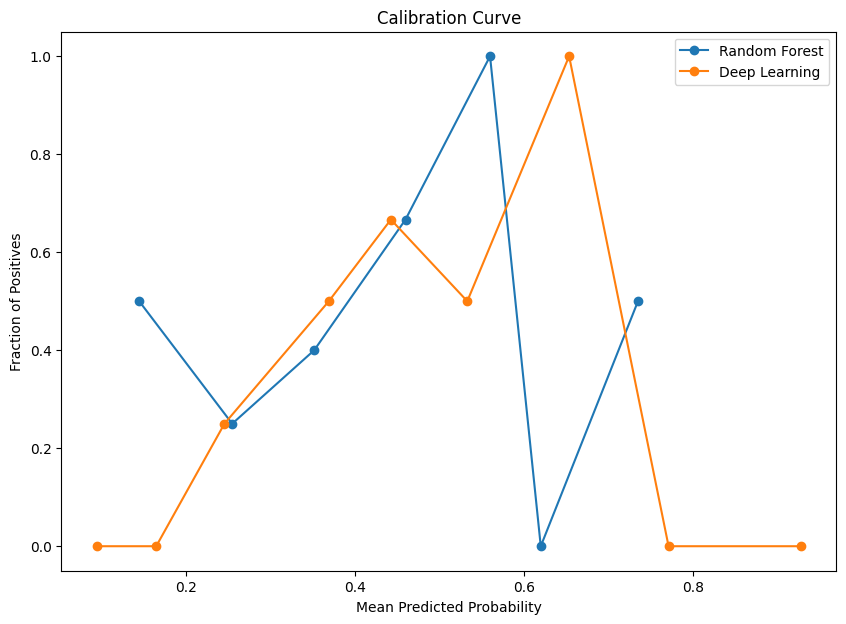

In [21]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming `model` is your Random Forest model and `dl_model` is your Deep Learning model
# Define predictions for Random Forest and Deep Learning models
y_pred_rf = rf_model.predict(X_test)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype(int).flatten()  # Ensure binary predictions

# Define predicted probabilities
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
dl_probabilities = dl_model.predict(X_test).flatten()  # Assuming it gives probabilities for class 1

# Create a DataFrame to compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Pred': y_pred_rf,
    'DL_Pred': y_pred_dl,
    'RF_Prob': rf_probabilities,
    'DL_Prob': dl_probabilities
})
print(comparison_df.head(10))

# Function to plot calibration curves
def plot_calibration_curve(probabilities, true_labels, model_name):
    fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, probabilities, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model_name)

# Plot calibration curves for both models
plt.figure(figsize=(10, 7))
plot_calibration_curve(rf_probabilities, y_test, 'Random Forest')
plot_calibration_curve(dl_probabilities, y_test, 'Deep Learning')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [22]:
# Input Instructions and Ranges
# print("1. batting_team and bowling_team: Team codes (e.g., 1 to 9). Ensure they are within the valid range based on your dataset.")
# print("2. current_run_rate: Current run rate of the batting team (Range: 4.0 to 10.0).")
# print("3. wickets_remaining: Number of wickets remaining (Range: 0 to 10).")
# print("4. runs_remaining: Runs remaining to win the match (Range: 0 to 200).")
# print("5. over: Current over of the match (Range: 0.0 to 20.0).")
# print("6. avg_runs: Average runs scored by the team in previous matches (Range: 130.0 to 200.0).")
# print("7. total_wickets: Total number of wickets lost by the batting team (Range: 0 to 10)")

# Results
output = {
    'batting_team': 5,
    'bowling_team': 8,
    'current_run_rate': 7.0,
    'wickets_remaining': 2,
    'runs_remaining': 150,
    'over': 15.0,
    'avg_runs': 168.0,
    'total_wickets': 2
}

print("Final Probabilities and Scoreline:")
predict_match_outcome(output)

Final Probabilities and Scoreline:
Random Forest Probability of Winning for Team 1: 72.00%
Random Forest Probability of Winning for Team 2: 28.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Deep Learning Probability of Winning for Team 1: 39.42%
Deep Learning Probability of Winning for Team 2: 60.58%
Estimated Final Score: 352.59
